In [1]:
import math, random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cost 函数
def compute_cost(X, Y, w, b):
    m = X.shape[0]
    total_cost = 0
    for i in range(m):
        total_cost += (np.dot(X[i], w) + b - Y[i]) ** 2
    total_cost /= 2 * m
    return total_cost

In [3]:
# gradient 函数
def compute_gradient(X, Y, w, b):
    m, n = X.shape
    gra_w = np.zeros(n)
    gra_b = 0
    for i in range(m):
        for j in range(n):
            gra_w[j] += (np.dot(X[i], w) + b - Y[i]) * X[i, j]
        gra_b += np.dot(X[i], w) + b - Y[i]
    gra_w /= m
    gra_b /= m
    return gra_w, gra_b

In [4]:
# 多维线性回归
def muliple_linear_regression(X, Y, w_init, b_init, alpha, num_iters, cost_func=compute_cost, gra_func=compute_gradient):
    w, b = w_init, b_init
    for i in range(num_iters):
        gra_w, gra_b = gra_func(X, Y, w, b)
        w = w - alpha * gra_w
        b = b - alpha * gra_b

        if i % math.ceil(num_iters/10) == 0:
            print(f'迭代第 {i} 次: 此时 w为{w}, b为{b:0.3e}, cost为{cost_func(X,Y,w,b):0.3e}')
    print(f'w 最终为{w}, b 最终为{b:0.3e}, cost为{cost_func(X,Y,w,b):0.3e}')
        
    return w, b

In [5]:
# 标准化 归一化
def zscore_normalize_features(X):
    # 平均值
    X_mean = np.mean(X, axis=0)
    # 标准差
    X_sigma = np.std(X, axis=0)
    # 标准化
    X_norm = (X - X_mean) / X_sigma
    return X_norm

In [48]:
# 载入data
X = np.arange(-20, 20, 2)
Y = 3 * X ** 3 + X ** 2 + 1 + random.uniform(-1, 1)

In [49]:
# 多项式回归
X_pol = np.c_[X, X**2, X**3, X**4, X**5]
X_norm = zscore_normalize_features(X_pol)
print(X_norm.shape)

(20, 5)


In [85]:
w_init = np.zeros(X_norm.shape[1])
b_init = 0
w_final, b_final = muliple_linear_regression(X_norm, Y, w_init, b_init, 1e-1, 500000)

迭代第 0 次: 此时 w为[ 833.57362434 -252.30849811  911.47652231 -334.358444    885.32362027], b为-1.064e+02, cost为2.106e+07
迭代第 50000 次: 此时 w为[7.04691396e-07 1.20734419e+02 9.14965179e+03 3.32931714e-07
 1.53840895e-06], b为-1.064e+03, cost为1.607e-14
迭代第 100000 次: 此时 w为[4.06666256e-10 1.20734419e+02 9.14965180e+03 1.56559815e-10
 8.56538580e-10], b为-1.064e+03, cost为5.068e-21
迭代第 150000 次: 此时 w为[4.06627815e-10 1.20734419e+02 9.14965180e+03 1.56555775e-10
 8.56487328e-10], b为-1.064e+03, cost为5.068e-21
迭代第 200000 次: 此时 w为[4.06630678e-10 1.20734419e+02 9.14965180e+03 1.56562233e-10
 8.56485358e-10], b为-1.064e+03, cost为5.085e-21
迭代第 250000 次: 此时 w为[4.06686774e-10 1.20734419e+02 9.14965180e+03 1.56561182e-10
 8.56569888e-10], b为-1.064e+03, cost为5.091e-21
迭代第 300000 次: 此时 w为[4.06687075e-10 1.20734419e+02 9.14965180e+03 1.56543152e-10
 8.56575489e-10], b为-1.064e+03, cost为5.092e-21
迭代第 350000 次: 此时 w为[4.06655337e-10 1.20734419e+02 9.14965180e+03 1.56541537e-10
 8.56526923e-10], b为-1.064e+03, cost为5.068e

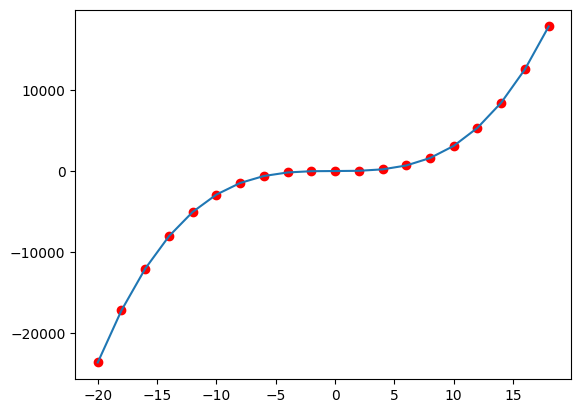

In [87]:
plt.scatter(X, Y, c='r')
plt.plot(X, np.dot(X_norm, w_final) + b_final)

In [16]:
x = np.arange(0, 20, 1)
Y = np.sin(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

w_init = np.zeros(X.shape[1])
b_init = 0
w_model, b_model = muliple_linear_regression(X, Y, w_init, b_init, 1e-1, 1000000)

迭代第 0 次: 此时 w为[-0.0006213   0.00746205  0.01175037  0.01306843  0.01272542  0.01157555
  0.01009859  0.00854745  0.0070482   0.00565829  0.00439883  0.00327224
  0.0022718 ], b为1.937e-02, cost为2.273e-01
迭代第 100000 次: 此时 w为[  3.5443264  -14.03970989   4.26435913   9.73729183   6.48703599
   1.04363118  -3.2649615   -5.4036511   -5.43978724  -3.84018969
  -1.1370536    2.20510786   5.82689281], b为1.937e-01, cost为7.584e-03
迭代第 200000 次: 此时 w为[  3.91201012 -15.73907413   5.87913655  10.92747328   6.10980814
  -0.20924103  -4.37860419  -5.74313047  -4.89561201  -2.73736308
  -0.08354354   2.45737208   4.48669163], b为1.937e-01, cost为6.089e-03
迭代第 300000 次: 此时 w为[  4.12685074 -16.88091693   7.15356652  11.7764163    5.67132041
  -1.31712381  -5.28908414  -5.93085453  -4.29835879  -1.67449621
   0.87822939   2.62717739   3.14229817], b为1.937e-01, cost为5.064e-03
迭代第 400000 次: 此时 w为[  4.30389469 -17.82129434   8.18534177  12.51417331   5.32580558
  -2.25668708  -6.080858    -6.10869847  -3.79465

<function matplotlib.pyplot.show(close=None, block=None)>

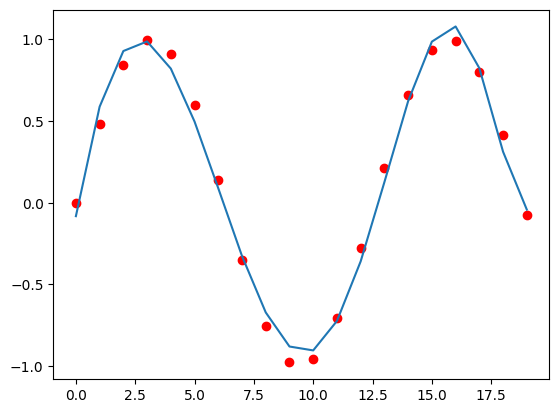

In [17]:
plt.scatter(x, Y, c='r')
plt.plot(x, np.dot(X, w_model) + b_model)
plt.show